## **Titanic**

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [52]:
url='train (1).csv'
df_train=pd.read_csv(url,sep=',')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
print(f'Tamaño de filas y columnas {df_train.shape}')

Tamaño de filas y columnas (891, 12)


In [54]:
print('Numero de nulos')
print(df_train.isnull().sum())

Numero de nulos
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
# Drop the columns Name, Passengerid, cabin y ticket
df_train.drop(columns='Name',inplace=True)
df_train.drop(columns='PassengerId',inplace=True)
df_train.drop(columns='Cabin',inplace=True)
df_train.drop(columns='Ticket',inplace=True)

In [57]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## **EDA**

In [58]:
print(df_train['Sex'].value_counts())
print('----------------------------')
print(df_train['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
----------------------------
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


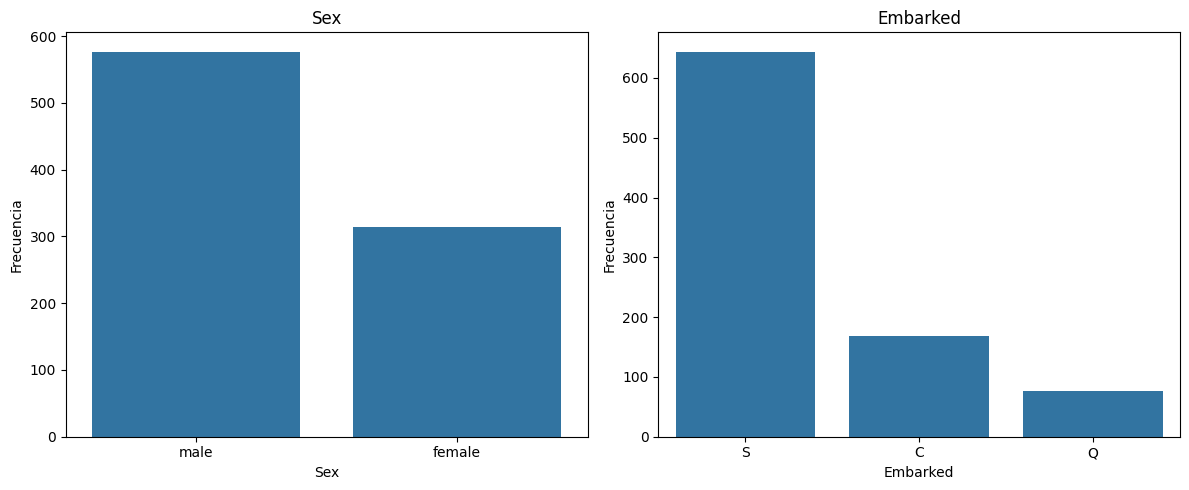

In [59]:
# Crear una figura con una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Ajusta el tamaño de la figura si es necesario

# Gráfico 1: Conteo de 'Sex'
sns.countplot(data=df_train, x='Sex', ax=axes[0])
axes[0].set_title('Sex', fontsize=12)
axes[0].set_ylabel('Frecuencia')

# Gráfico 2: Conteo de 'Embarked'
sns.countplot(data=df_train, x='Embarked', ax=axes[1])
axes[1].set_title('Embarked', fontsize=12)
axes[1].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espacio entre gráficos
plt.show()

In [60]:
# Conteo de 'Survived'
print(df_train['Survived'].value_counts())
# Conteo de 'Pclass'
print(df_train['Pclass'].value_counts())
# Conteo de 'SibSp'
print(df_train['SibSp'].value_counts())
# Conteo de 'Parch'
print(df_train['Parch'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


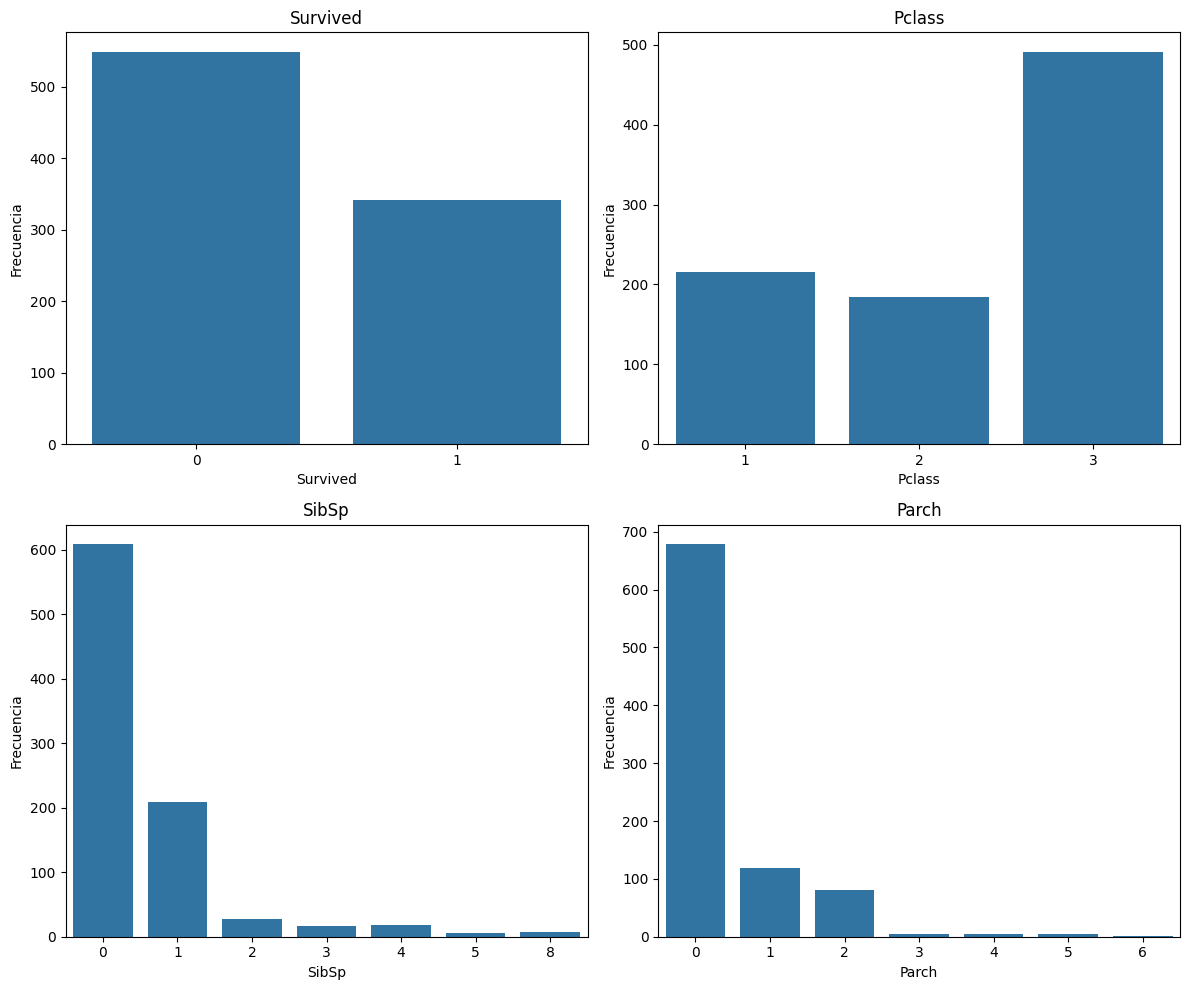

In [61]:
# Crear una figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Ajusta el tamaño de la figura si es necesario

# Gráfico 1: Conteo de 'Survived'
sns.countplot(data=df_train, x='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Survived')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico 2: Conteo de 'Pclass'
sns.countplot(data=df_train, x='Pclass', ax=axes[0, 1])
axes[0, 1].set_title('Pclass')
axes[0, 1].set_ylabel('Frecuencia')

# Gráfico 3: Conteo de 'SibSp'
sns.countplot(data=df_train, x='SibSp', ax=axes[1, 0])
axes[1, 0].set_title('SibSp')
axes[1, 0].set_ylabel('Frecuencia')

# Gráfico 4: Conteo de 'Parch'
sns.countplot(data=df_train, x='Parch', ax=axes[1, 1])
axes[1, 1].set_title('Parch')
axes[1, 1].set_ylabel('Frecuencia')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


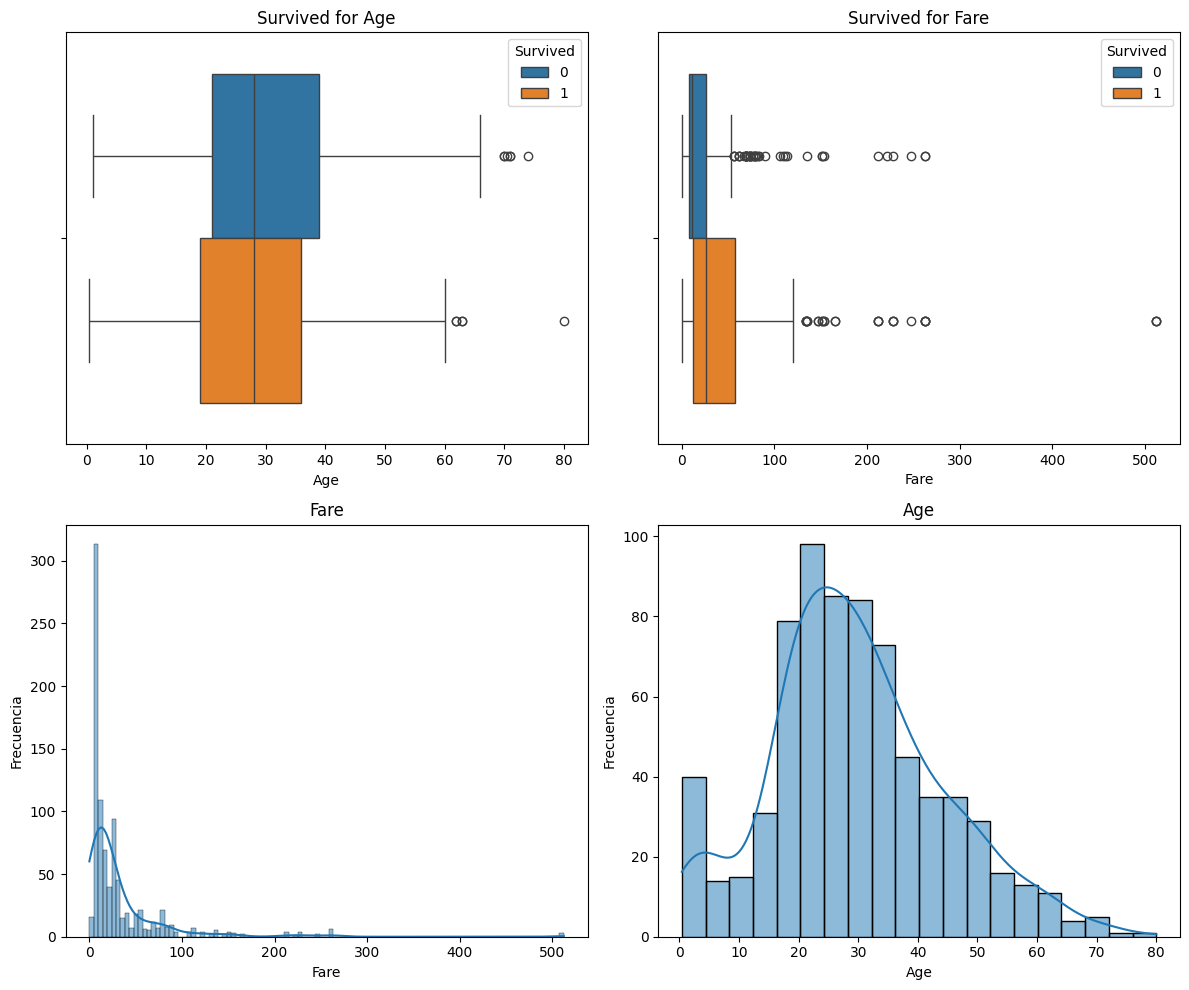

In [62]:
# Crear una figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 

# Gráfico 1: Boxplot de 'Age' con 'Survived' como hue
sns.boxplot(data=df_train, x='Age', hue='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Survived for Age')

# Gráfico 2: Boxplot de 'Fare' con 'Survived' como hue
sns.boxplot(data=df_train, x='Fare', hue='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Survived for Fare')

# Gráfico 3: Histograma de 'Fare' con KDE
sns.histplot(data=df_train, x='Fare', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Fare')
axes[1, 0].set_ylabel('Frecuencia')

# Gráfico 4: Histograma de 'Age' con KDE
sns.histplot(data=df_train, x='Age', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Age')
axes[1, 1].set_ylabel('Frecuencia')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


In [63]:
df_train[['Fare','Age']].describe()

,Fare,Age
count,891.000000,714.000000
mean,32.204208,29.699118
std,49.693429,14.526497
min,0.000000,0.420000
25%,7.910400,20.125000
50%,14.454200,28.000000
75%,31.000000,38.000000
max,512.329200,80.000000


In [64]:
mean_age=df_train['Age'].mean().round()
# Reemplazar los NaN en 'Age' con la media
df_train['Age'].fillna(mean_age, inplace=True)
# Verificar los cambios
print(df_train['Age'].isnull().sum())

0


In [67]:
# label encoder
le=LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
df_train['Embarked']=le.fit_transform(df_train['Embarked'])

In [68]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,30.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [70]:
X=df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']]
y=df_train['Survived']

In [74]:
# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimimos las formas de los conjuntos de datos
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (712, 7)
Forma de X_test: (179, 7)
Forma de y_train: (712,)
Forma de y_test: (179,)


# Machine Learning Algorithm (MLA) Selection and Initialization

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
# Definir los modelos base (weak learners)
model_1 = ('svm', SVC(probability=True))
model_2 = ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
model_3 = ('knn', KNeighborsClassifier(n_neighbors=5))

# Definir el modelo meta (meta learner)
meta_model = LogisticRegression()

# Crear el modelo de Stacking
stacking_model = StackingClassifier(
    estimators=[model_1, model_2, model_3],
    final_estimator=meta_model,
    cv=5  # Validación cruzada para evaluar el rendimiento de los modelos base
)

# Entrenar el modelo de Stacking
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('svm', SVC(probability=True)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [76]:
# Realizar predicciones y evaluar el modelo
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Stacking Model: {accuracy:.2f}')

Accuracy of Stacking Model: 0.84


In [82]:
cl_rep = classification_report(y_test, y_pred)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.73      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



Confusion Matrix:
[[96  9]
 [20 54]]


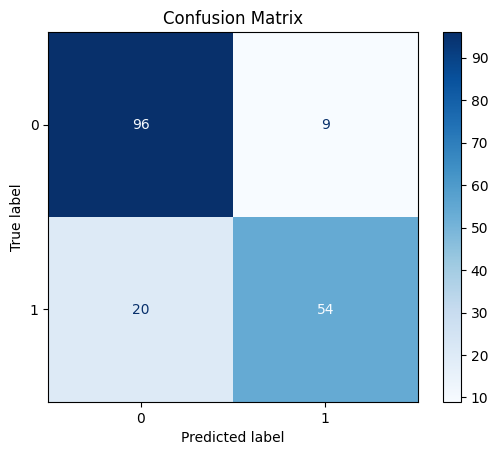

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print("Confusion Matrix:")
print(conf_matrix)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


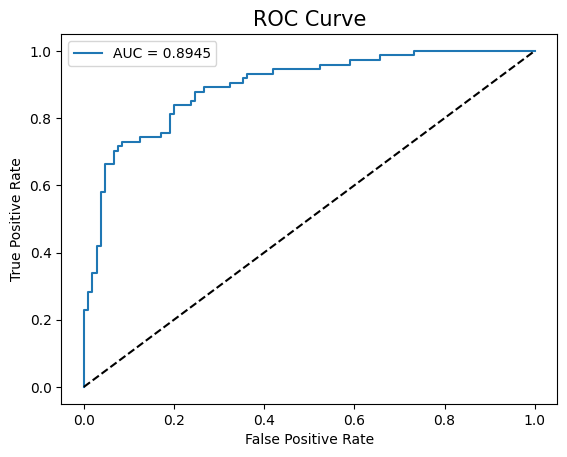

In [80]:
def roc_model(model):
  from sklearn.metrics import roc_curve, roc_auc_score
  y_pred_proba=model.predict_proba(X_test)[:][:,1]
  df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
  df_actual_predicted.index = y_test.index
  fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
  auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

  plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
  plt.plot(fpr, fpr, linestyle = '--', color='k')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve', size = 15)
  plt.legend()

roc_model(stacking_model)

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Definir los modelos base (weak learners)
model_1 = ('svm', SVC(probability=True))
model_2 = ('rf', RandomForestClassifier(random_state=42))
model_3 = ('knn', KNeighborsClassifier())

# Definir el modelo meta (meta learner)
meta_model = LogisticRegression()

# Crear el modelo de Stacking
stacking_model = StackingClassifier(
    estimators=[model_1, model_2, model_3],
    final_estimator=meta_model,
    cv=5
)

# Definir el grid de hiperparámetros para cada modelo
param_grid = {
    'rf__n_estimators': [100],
    'rf__max_depth': [10,20],
    'knn__n_neighbors': [5,7],
    'svm__C': [0.30],
    'svm__kernel': ['linear']
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros y el rendimiento
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

Mejores hiperparámetros: {'knn__n_neighbors': 5, 'rf__max_depth': 10, 'rf__n_estimators': 100, 'svm__C': 0.3, 'svm__kernel': 'linear'}
Mejor puntuación de validación cruzada: 0.8201910765291046


In [96]:
# Realizar predicciones y evaluar el modelo
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8044692737430168

In [97]:
cl_rep_1 = classification_report(y_test, y_pred)
print(cl_rep_1)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179

